# Регрессия - последняя подготовка перед боем!

> 🚀 В этой практике нам понадобятся: `numpy==1.21.2, pandas==1.3.3, matplotlib==3.4.3, scikit-learn==0.24.2, seaborn==0.11.2` 

> 🚀 Установить вы их можете с помощью команды: `!pip install numpy==1.21.2 pandas==1.3.3 matplotlib==3.4.3 scikit-learn==0.24.2 seaborn==0.11.2` 


## Содержание

* [Первые реальные данные](#Первые-реальные-данные)
* [Анализ одной переменной (унивариантный - univariate)](#Анализ-одной-переменной-унивариантный---univariate)
* [Анализ нескольких переменных (мультивариантный - multivariate)](#Анализ-нескольких-переменных-мультивариантный---multivariate)
  * [LSTAT - MEDV](#LSTAT---MEDV)
  * [RM - MEDV](#RM---MEDV)
* [Подготовка кода предобработки](#Подготовка-кода-предобработки)
  * [fit()](#fit)
  * [transform()](#transform)
* [Back to programming!](#Back-to-programming)
* [Заключение](#Заключение)
* [Вопросы для закрепления](#Вопросы-для-закрепления)
* [Полезные ссылки](#Полезные-ссылки)


И снова привет! 

К этому моменту мы многому научились и уже знаем немало! Тем не менее, много знаний не бывает, ведь мы приближаемся к первой боевой задаче!

Да-да, скоро вам предстоит самостоятельно провести работу с набором данных! Правда, мы немного считерим, потому что в этой практике с этими данными частично познакомимся, но сделаем это частично, чтобы не забирать у вас всё веселье!

Ранее мы много говорили о том, как учить модель машинного обучения, как разделять данные, как анализировать модель и т.д. В работе с данными эта часть зовётся "обучение и анализ модели". В этой практике мы поговорим о совершенно новой части в работе с данными и научимся данные анализировать.

Зачем это нужно? Ну, просто обучить модель на данных - это зовётся **baseline**. **Baseline** как правило - это самое быстрое и простое решение, которое даёт результат!

Вот, например, у нас есть данные о ценах на земли в городе. Задача - на основе этих данных предсказывать цены на другие участки земли. Самым простым решением будет взять сумму целевых значений (цен) и поделить на количество! Так мы получим среднее значение цены в данных и его можно постоянно предсказывать!

Вот таким простым способом мы получили модель, которая всё время предсказывает постоянное значение. Да, у неё есть какая-то ошибка, да, это вообще не будет похоже на зависимость в данных, но не это важно!

Важно то, что имея baseline, вы будете точно знать, относительно какого решения нужно улучшать вашу модель! Уже и MAE/RMSE есть с чем сравнить - одни плюсы!

> Обратите внимание, что показатель R2 как раз в этом случае будет равень 0, так как значения больше нуля - а значит, модель лучше, чем простое предсказание среднего!

> 🤓 **Baseline решение** - простое и быстро достижимое решение, используется для дальнейшей оценки улучшений предсказаний при работе с данными.

Так вот к чему всё это? Сейчас мы пока что с вами научились строить baseline модели. 

А как научиться делать что-то лучше? Вот тут то и не хватает недостающей части, о которой мы с вами поговорим! И часть эта зовется - **анализ данных**!

Но зачем он нужен, если модель делает всё за нас? Учится на данных, регуляризацией мы убираем оверфит, на всякий проверим показатели на тестовой выборке - куда лучше?

Поверьте, есть куда стремиться!

В работе с реальными данными есть простое правило - не сложность модели определяет, кто будет круче, а качество и количество данных!

> ⚠️ Ещё раз, данные важнее, чем модели!

То есть, важно понимать, что происходит с моделью, оверфит это или нужна сложность модели побольше (недообучение). Но хорошее качество и количество данных могут дать намного больший прирост точности, так как шума и выбросов в них будет меньше, а зависимости более выражены.

И как же тогда нам сделать данные качественнее, если вот у нас есть датасет, и сделать его больше мы не можем?

Ответ прост - как можно лучше понять данные и предобработать, а для этого - проанализировать их в первую очередь!

> ⚠️⚠️ Очень важный аспект - **понимание данных**. Если вы хорошо понимаете, что за данные вы имеете и что каждый признак означает, то высока вероятность, что вы лучше их обработаете и очистите!

В таком случае, подводим **итог**! Создавать baseline модели на тех данных, что мы имеем - полезный навык. Но если мы хотим сделать нашу модель ещё круче и эффективнее, то нужно данные проанализировать и подготовить.

> ⚠️ Все новые термины **обработка**, **очистка** и другие действия с данными относятся к общему понятию **подготовка данных** для модели. Baseline может строиться на неподготовленных данных и решать задачу (вероятнее всего плохо), подготовка данных нацелена на улучшение качества данных, чтобы модель, которая на них учится, выявила необходимые зависимости без влияния шума.

> ⚠️ Для реализации хорошей **подготовки данных** необходимо провести **анализ данных**, чтобы данные лучше понять.

Это всё слова, но пора к делу! 

Вы ещё увидите, почему анализ данных иногда бывает намного интереснее простого обучения модельки!

In [3]:
# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import random
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = TEXT_COLOR
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style('darkgrid')

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

## Первые реальные данные

Настройтесь, сейчас мы с вами загрузим наши первые реальные данные и начнём с ними работать. Чувствуете это предвкушение?

<p align="center"><img src="https://vk.com/sticker/1-2920-512-9" width=300/></p>

Стоп, а где эти данные взять?

Не переживайте, сегодня не вы одни занимаете наукой о данных, поэтому есть очень много ресурсов с разными данными, а мы постучимся на [Kaggle](https://www.kaggle.com/)! Для начала вам нужно там зарегистрироваться, если вы этого ещё не сделали! 

Дальше, нам нужно достать данные, которые нам сейчас нужны - мы воспользуемся [этим датасетом](https://www.kaggle.com/fedesoriano/the-boston-houseprice-data). После регистрации у вас будет возможность скачать CSV файл `boston.csv`.

После этого всё зависит от того, где вы работаете. Если вы проходите практики на Google Colab, то вам нужно загрузить файл с данными на сам Colab (для этого есть меню слева).

Если вы работаете локально, на своей машине (компьютере), то достаточно положить рядом с ноутбуком!

> ✨ Если вы всё выполнили верно, то код дальше будет выполняться без проблем. Если нет - обратитесь к преподавателю за помощью!

In [4]:
df_src = pd.read_csv('boston.csv')

Когда данные успешно загружены, то важно первым делом посмотреть на размер данных и на сами данные!

In [5]:
df_src.shape

(506, 14)

In [6]:
df_src.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [7]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# И конечно, сразу посмотреть на общие пропуски в данных
df_src.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Смотрите, пара действий, а мы уже видим некоторую информацию о данных. 

* Во-первых, у нас есть 14 переменных, из которых как минимум одну мы планируем предсказывать. 

* Во-вторых, во всём наборе данных есть всего 506 записей (примеров). Это немного, но хватит, чтобы много обсудить!

Но здесь есть важная особенность, каждая колонка имеет название, но все они в виде аббревиатур! Это плохо, так как это затруднит разбор данных и может ухудшить понимание. Небольшой поиск по странице датасета и в интернете даёт как минимум два источника, в которых есть следующая информация о данных:
- https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html#:~:text=The%20Boston%20Housing%20Dataset,the%20area%20of%20Boston%20Mass
- https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset

Информация о колонках:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town
- CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000’s

Отлично, какая-то информация есть и её можно перевести с английского, что даёт нам:

- CRIM - уровень преступности на душу населения по городам
- ZN - доля жилой земли, зонированной для участков площадью более 25 000 кв. футов.
- INDUS - доля акров нетоварного бизнеса в городе
- CHAS - переменная-флаг приближенности к реке (= 1 если рядом с рекой; 0 в ином случае)
- NOX - концентрация оксидов азота (частей на 10 миллионов)
- RM - среднее количество комнат в одном жилом помещении
- AGE - доля квартир, занятых владельцами, построенных до 1940 года
- DIS - взвешенные расстояния до пяти бостонских центров занятости
- RAD - индекс доступности радиальных магистралей
- TAX - недвижимость с полной стоимостью-ставка налога за 10 000 долларов США
- PTRATIO - соотношение числа учащихся и учителей по городам
- B - 1000(Bk - 0.63)^2, где Bk - доля чернокожего населения по городам
- LSTAT - процент бедности населения
- MEDV - средняя стоимость домов, занятых владельцами, в 1000 долларов США

Шикарно, это пригодится нам в ходе анализа!

Уже сейчас мы можем сформировать постановку задачи предсказания - нам нужно предсказывать **цену дома (MEDV)** по 13-ти имеющимся признакам. Не факт, что мы всеми признаками воспользуемся, но всё-таки это то, что мы сейчас имеем.

> Не бойтесь, работа с 13 переменными, когда мы вот только работали всего с одной - не так страшна, как кажется. Более того, когда мы строили полиномиальную регрессию 15-го порядка, то там у нас было аж 15 признаков!

Так с чего же начинается анализ данных? Самое простое - с анализа каждой переменной!

Что мы хотим увидеть? В анализе одной переменной важно понять:

- что представляет из себя переменная
- есть ли у неё пропуски и как лучше их заполнитиь
- есть ли у переменной явные выбросы
- какое у переменной распределение и есть ли смещение
- и другие интересности, которые мы заметим =)

В этой практике мы пройдёмся по наиболее важным переменным, а вот в реальной задаче вам предстоит проанализировать каждую переменную! Так можно составить более полную картину данных!

> ⚠️ Этот список не исчерпывающий, но он сообщает, что любые странности и закономерности в данных важно выявить и проанализировать на предмет того, полезный ли эффект наблюдается или его лучше убрать, чтобы моделе было проще искать базовые зависимости в данных.

## Анализ одной переменной (унивариантный - univariate)

Начнем с анализа под названием унивариантный. Он так называется, потому что мы анализируем каждую переменную по отдельности. Обычно, самым простым вариантом является построение распределения переменной, чтобы понять характер распределения.

Здесь для примера мы возьмем переменную RM (среднее количество комнат в одном жилом помещении).

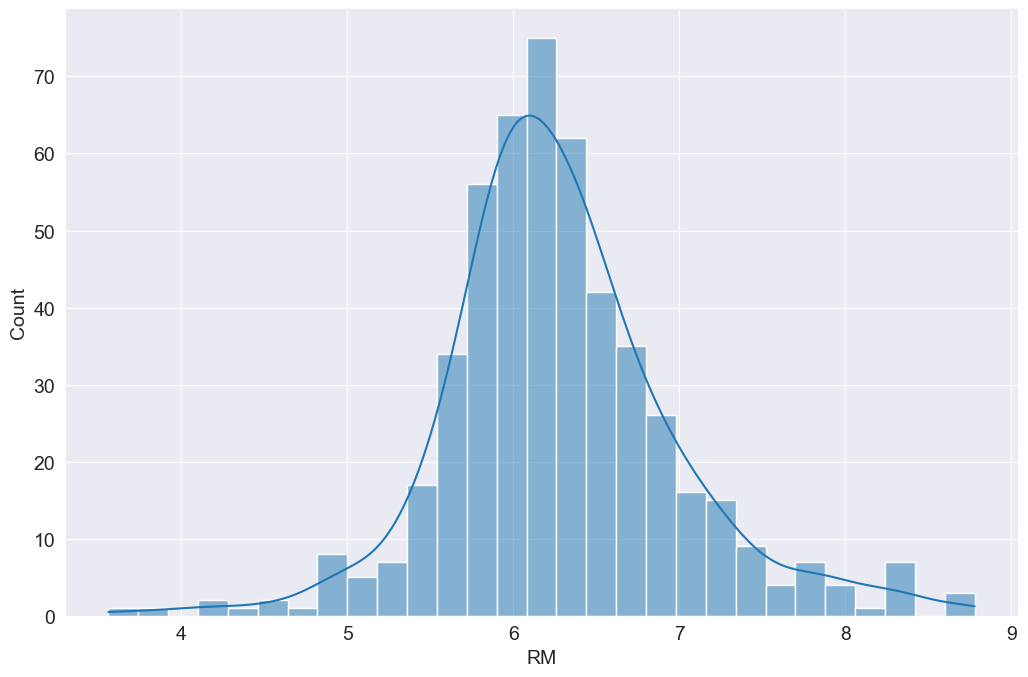

In [9]:
sns.displot(df_src['RM'], kde=True, height=7, aspect=1.5)

Что мы видим на графике? 

Распределение этой переменной близко к нормальному (Gauss-like - близко к Гауссовому). 

Пределы значений в диапазоне около [3; 9] комнат.  

Здесь важный акцент мы сделаем на "нормальности" распределения, так как бывают разные вариации нормальности. При анализе другой переменной мы это увидим.

Тогда по этой переменной мы можем заключить следующее: 

* по таблице пропусков переменная пропусков не имеет
* распределение близкое к нормальному
* значения лежат в пределах, ожидаемых для описания этой переменной - количество комнат. 

Не сложно, правда?

Другую переменную мы возьмём явно с интересным эффектом:

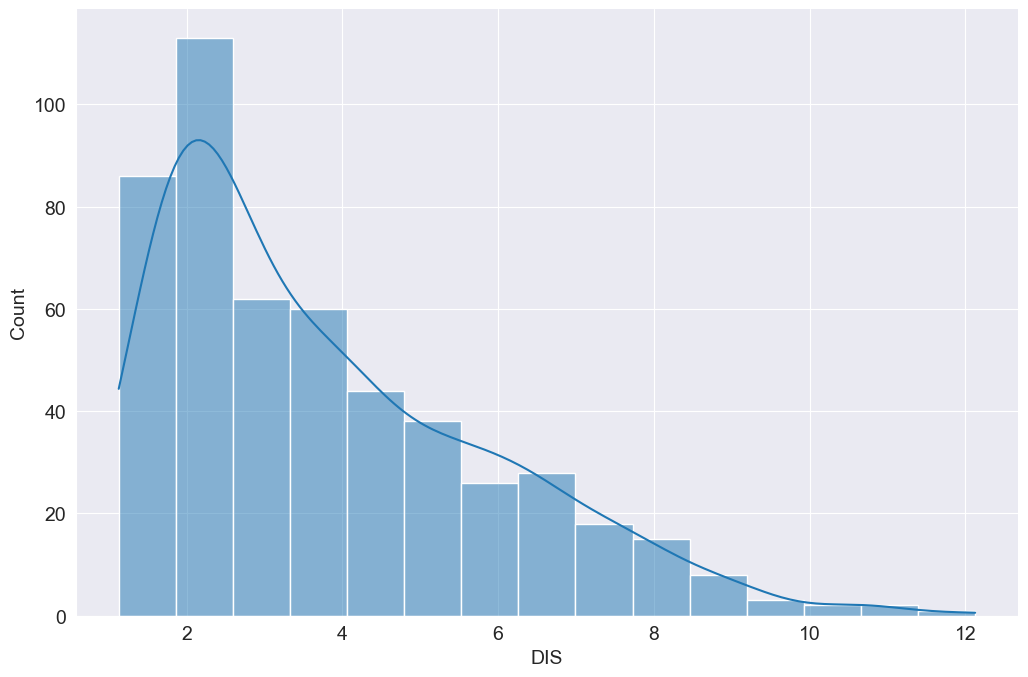

In [10]:
sns.displot(df_src['DIS'], kde=True, height=7, aspect=1.5)

Вот эту переменную уже сложнее назвать нормально распределённой. Она имеет явное **смещение влево**. Ещё это назвают **правый хвост**, так как правая часть похожа на хвост.

Что делать с такими переменными? 

Ну, есть разные способы. Тут мы уже с вами говорим про методы модификации данных, а значит начинаем строить план обработки данных!

Можно выделить два наиболее явных способа исправления распределения:

- исправление с помощью логарифма (он исправляет левое смещение)
- воспользоваться автоматизированными способами коррекции, например, [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

Первый способ мы попробуем сейчас, а вот со вторым вы можете разобраться самостоятельно, когда в следующей практике ринетесь в бой!

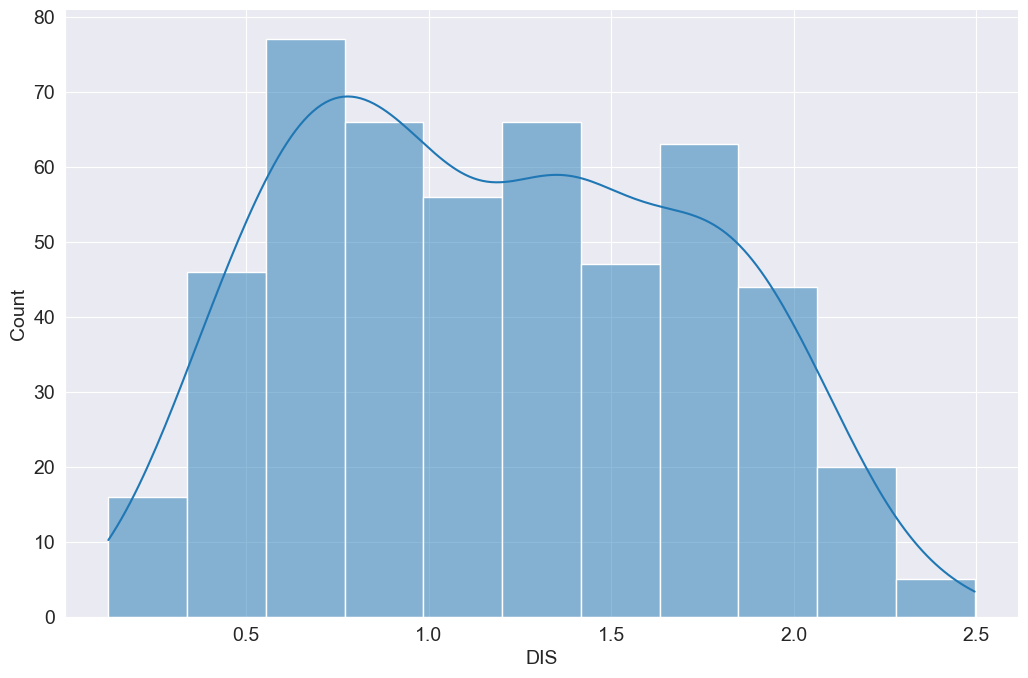

In [11]:
dis_log_col = np.log(df_src['DIS'])

sns.displot(dis_log_col, kde=True, height=7, aspect=1.5)

Как видите, центр распределения сместился ближе к середине и само распределение стало больше похоже на нормальное, результат - успех!

> 🔥 Не только в DS, но и в других областях, где вы модифицируете данные - всегда проверяйте результат и сравнивайте с ожиданиями! Это важно, так как без проверки промежуточного результата может появиться проблема, которая доставит много головной боли потом!

> ⚠️ Исправление распределения очень важно для линейных моделей. Мы сейчас не заостряем внимание на этом, но в следующей самостоятельной практике обязательно сравните результаты с исправлением и без него!

В результате, вывод по переменной:

* пропусков не имеет
* *распределение смещено, поэтому требуется исправление*

Последний вывод важно записать в список дел, так как по результатам мы будм делать всю обработку данных единым образом.

Давайте для примера возьмём ещё одну переменную, чтобы проанализировать нестандартное распределение:

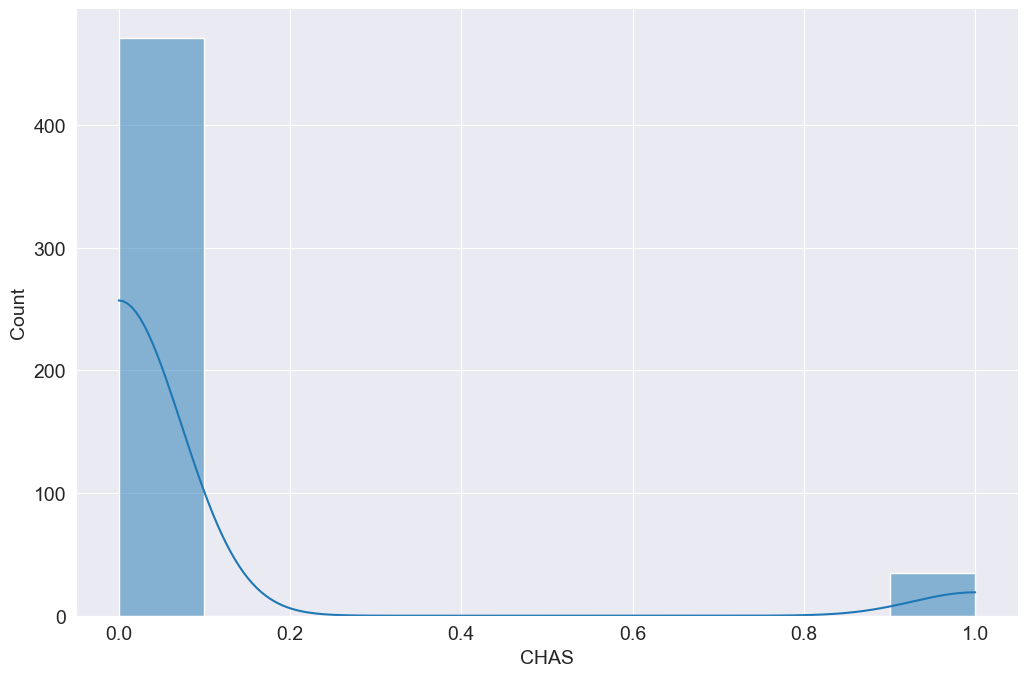

In [12]:
sns.displot(df_src['CHAS'], kde=True, height=7, aspect=1.5)

Можно было бы сказать, что распределение смещено влево, но обратите внимание - в данных всего два значения: 0 и 1. Давайте это проверим:

In [13]:
df_src['CHAS'].unique()

array([0, 1], dtype=int64)

Действительно, что же нам в таком случае делать? 

Да ничего, это распределение бимодальное, поэтому мы не будем пытаться его исправить. 

Вывод по переменной: 

* пропусков нет
* распределение бимодальное

Делать с этой переменной пока ничего не будем!

Остальные переменные мы оставим за кадром, чтобы вам тоже было, с чем поработать!

По результату анализа одной переменной делается вывод об основных особенностях каждой переменной. Мы с вами ещё научимся другим подходам анализа и многому интересному, но пока достаточно понимать следующие вещи:

- имеет ли переменная пропуски (как их заполнять узнаем потом)?
- понимаем ли мы суть переменной, сходится ли с описанием и логичные ли значения?
- нужно ли корректировать распределение?

## Анализ нескольких переменных (мультивариантный - multivariate)

Вот мы переходим к более вкусному анализу - зависимости между переменными!

И начнем мы с определения **корреляций**! 

Мы уже много говорили о том, что в данных есть зависимости, но наблюдали мы их только на графиках. Как и во всех методах - хорошо бы иметь метод, который численно подтвердит наличие зависимости в данных! Есть он у меня для вас!

Для примера мы возьмём пару переменных - полный анализ (все переменные) вы проведёте самостоятельно!

In [14]:
# Для примера выберем следующие признаки
# Мы специально включили целевую переменную, чтобы показать, как проводить вместе в ней анализ
features = ['CRIM', 'LSTAT', 'RM', 'MEDV']

correlation_mtrx = df_src[features].corr()
correlation_mtrx

,CRIM,LSTAT,RM,MEDV
CRIM,1.000000,0.455621,-0.219247,-0.388305
LSTAT,0.455621,1.000000,-0.613808,-0.737663
RM,-0.219247,-0.613808,1.000000,0.695360
MEDV,-0.388305,-0.737663,0.695360,1.000000


Таблица - это хорошо, но, как обычно, график лучше воспринимается =)

<AxesSubplot:>

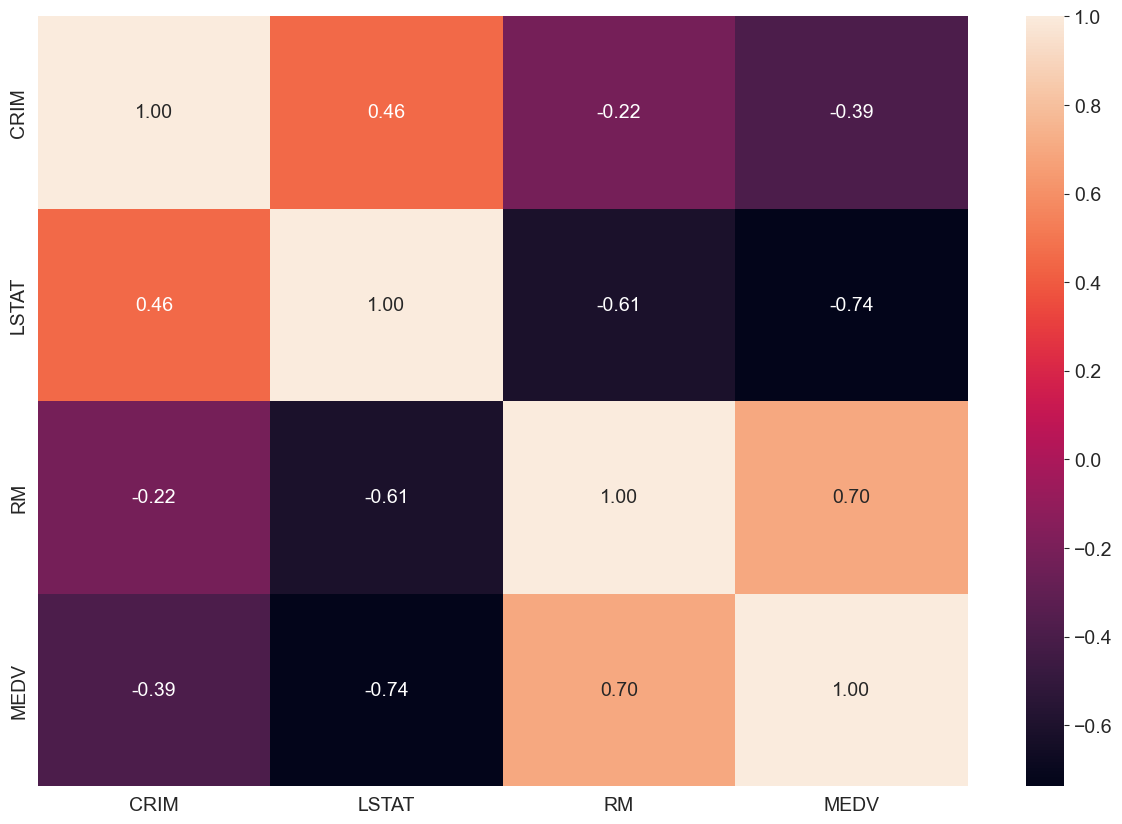

In [15]:
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

Корреляция - это способ численно показать наличие зависимости между двумя переменными. 

Давайте попробуем проанализировать то, что мы видим здесь. 

С целевой переменной (MEDV) имеют близкую к высокой корреляция (считается, что высокая корреляция +/-  0.8-0.85 и выше по модулю) переменные RM и LSTAT. Это **может** означать, что эти переменные сильнее влияют на формирование цены, чем признак CRIM. 

Почему **может**? Да потому, что коэффициент корреляции - это лишь число, которое может не полностью отражать картину, поэтому такие выводы должны лишь заставлять задуматься, но ни в коем случае не делать конечные выводы лишь на основе корреляции!

> 🤓 Корреляция всегда оценивается по модулю. Она может быть как высокой положительной, так и высокой отрицательной. Это для случая коэффициента Пирсона. Есть и другие коэффициенты, которые имеют диапазон [0; 1], но это уже совсем другая история =) 

Поглядите, что такое корреляция на более общем представлении разных ситуаций:

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/correlations.png" width=600/></p>

> ⚠️ Высокая корреляция переменных между собой является эффектом **мультиколлинеарности признаков**. Это плохой эффект для модели, так как в случае сильной взаимосвязи переменных между собой модель может запутаться в расставлении весов независимым переменным. Они ведь не просто так зовутся независимыми! Одна из практик - в данных для предсказания оставлять одну из пары зависимых между собой переменных, а другую убирать из данных.

По умолчанию, метод `.corr()` вычисляет коэффициент корреляции Пирсона. Этот тип коэффициента корреляции хорошо оценивает линейные зависимости. Попробуйте разобраться в документации, как оценить корреляцию по Спирману (Spearman) и выведите матрицу. Оцените, как изменились коэффициенты. Как изменился показатель на LSTAT-MEDV? Почему?

rho =  [[ 1.          0.63476026 -0.30911647 -0.55889095]
 [ 0.63476026  1.         -0.64083156 -0.85291414]
 [-0.30911647 -0.64083156  1.          0.63357643]
 [-0.55889095 -0.85291414  0.63357643  1.        ]]
p  =  [[0.00000000e+000 2.02639766e-058 1.15122026e-012 6.55333589e-043]
 [2.02639766e-058 0.00000000e+000 7.47841697e-060 2.22172752e-144]
 [1.15122026e-012 7.47841697e-060 0.00000000e+000 3.82297627e-058]
 [6.55333589e-043 2.22172752e-144 3.82297627e-058 0.00000000e+000]]


<AxesSubplot:>

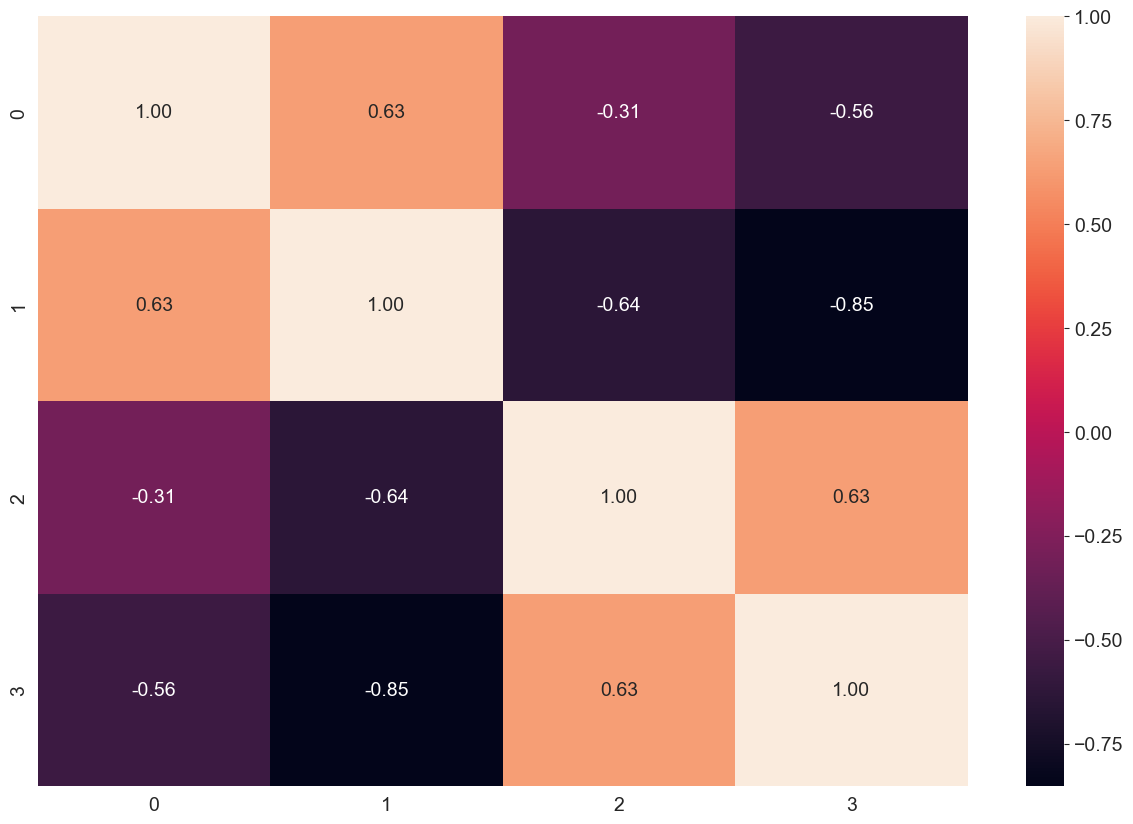

In [16]:
# TODO - выведите матрицу корреляции по Спирману и проанализируйте ее
from scipy.stats import spearmanr
rho,p = spearmanr(df_src[features])
print('rho = ', rho)
print('p  = ', p)
sns.heatmap(rho, annot=True, fmt='.2f')


Отлично, вот так незатейливо мы научились анализировать зависимости в данных без просмотра данных. 

На основе этого мы можем построить первоначальные выводы, но не посмотреть на данные (визуализировать их) - это сродне очень серьезной ошибке. Всегда важно по максимуму визуализировать данные и просматривать их. Так можно тщательнее провести анализ и узнать больше полезной информации о данных!

Поэтому, давайте воспользуемся хитрым графиком для отображения зависимостей между данными:

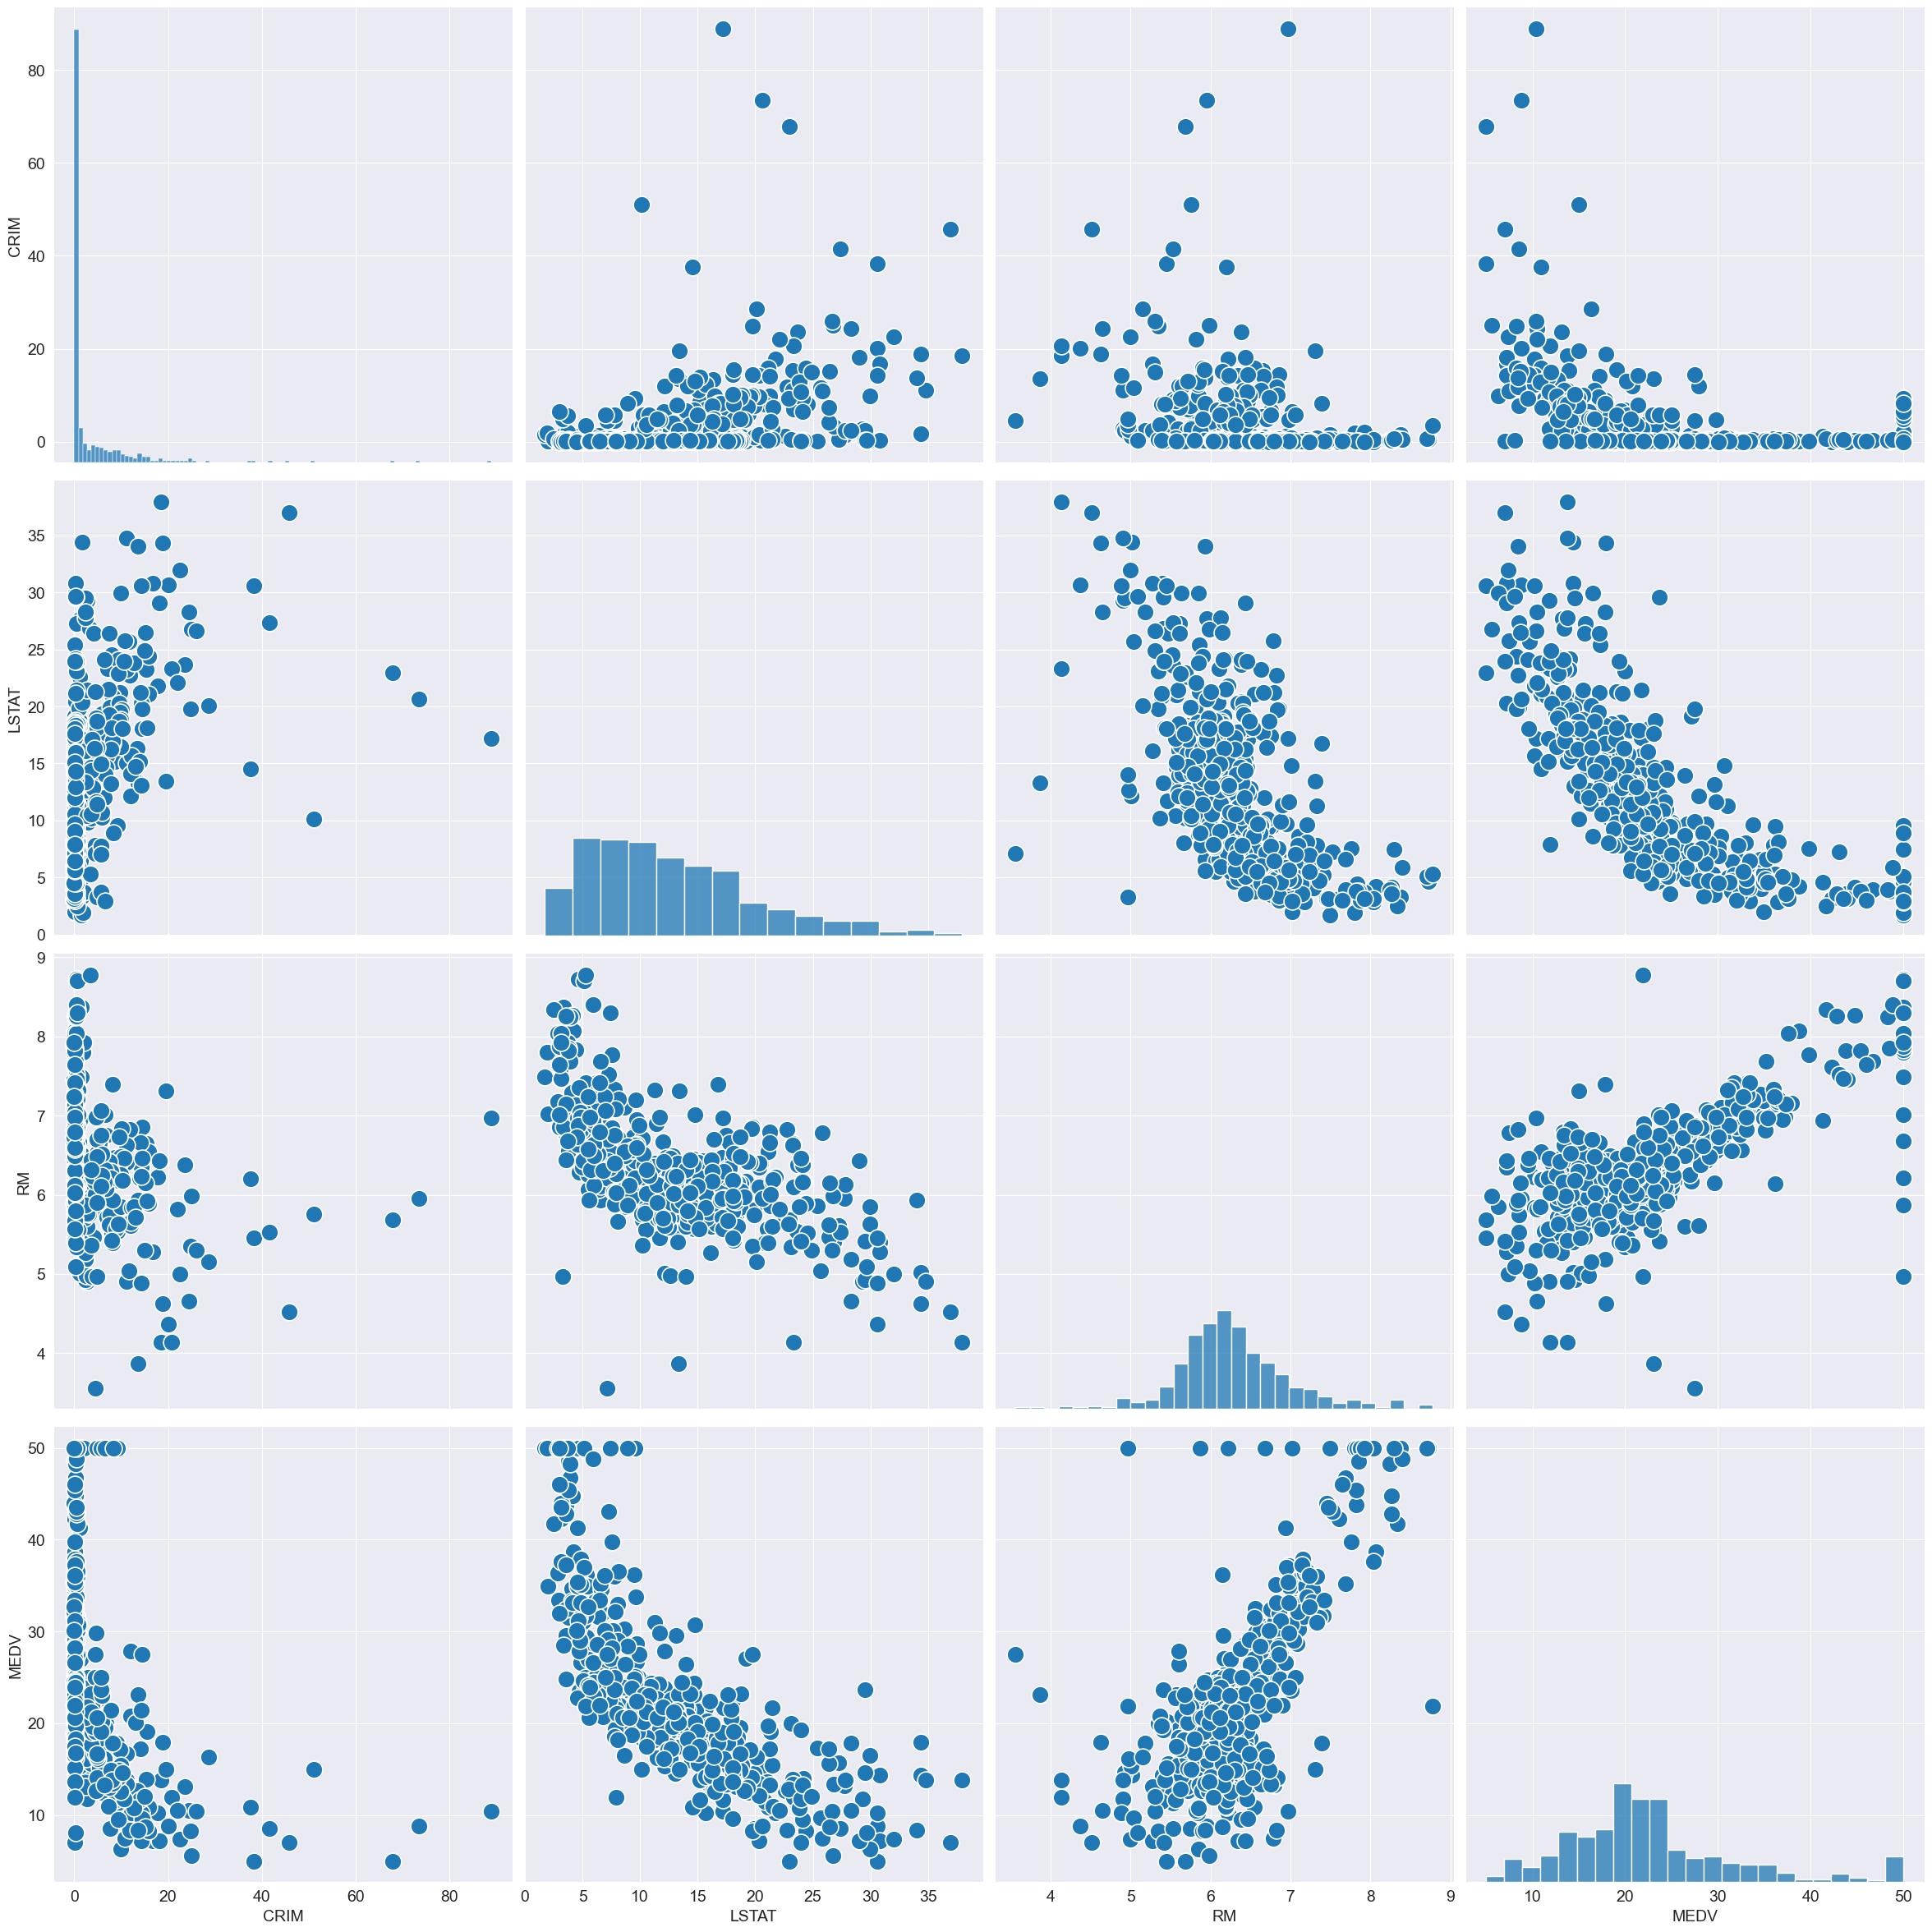

In [17]:
sns.pairplot(df_src[features], diag_kind='auto', height=6)

Что мы видим на графике? 

По главной диагонали отображается распределение самой переменной, так как на 2d графике показывать точки переменной самой с собой - это будет просто линия. В отличных от диагональных ячейках располагаются графики распределения в плоскости одной переменной против другой.

Здесь сразу можно сделать два вывода:
- LSTAT-MEDV имееть нелинейную зависимость (видите, как замедляется уменьшение MEDV при увеличении LSTAT?)
- На графике RM-MEDV видны точки, который очень "странно" лежат. Явно видно, что с увеличением RM MEDV растёт, но есть несколько точек, которые лежат как бы на прямой, вне зависимости от RM. Их нужно проанализировать!

Давайте перейдем к конкретному разбору!

### LSTAT - MEDV

Попробуем вывести точечный график переменных:

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

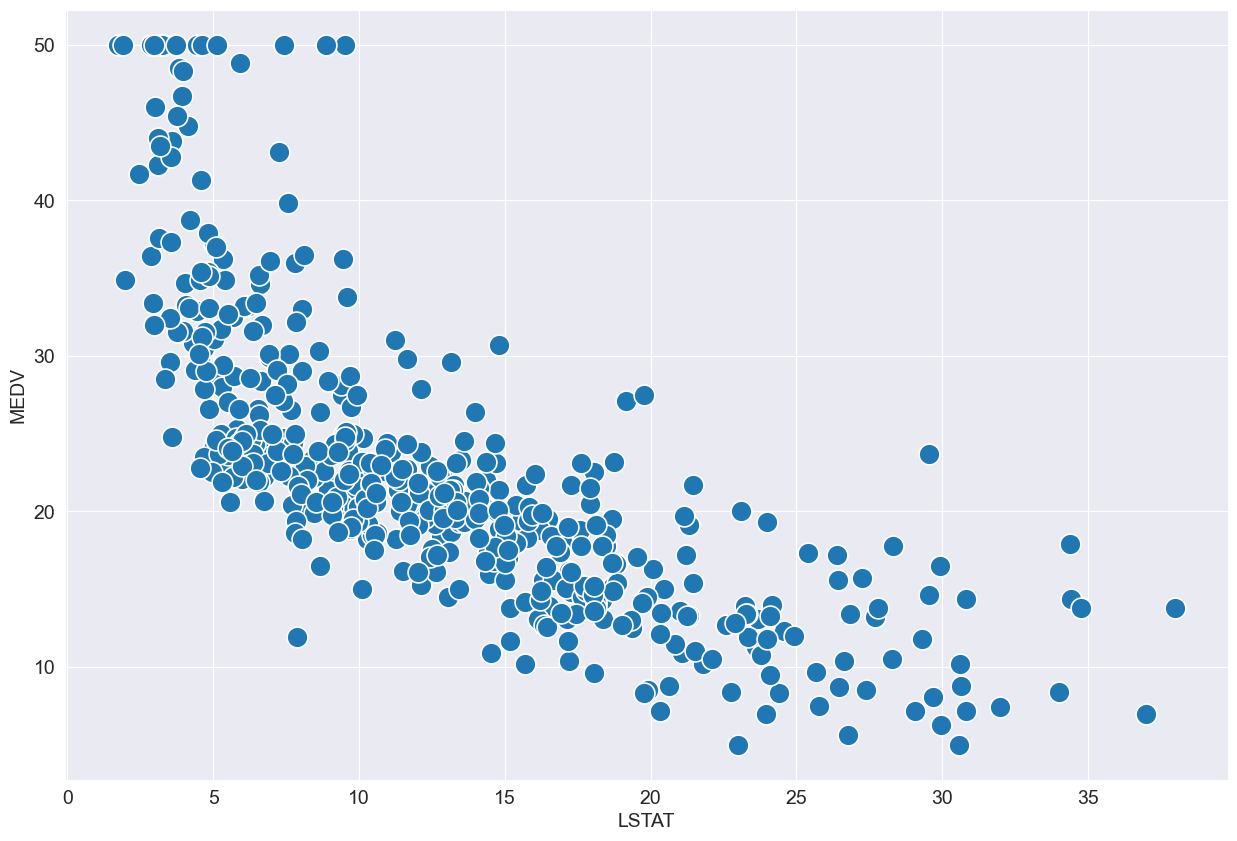

In [18]:
sns.scatterplot(x='LSTAT', y='MEDV', data=df_src)

Здесь явно выделяется нелинейная зависимость, поэтому мы в ходе предобработки сформируем новый признак - вторая степень от LSTAT. Это обусловлено этой явной нелинейностью. Запишем в планы!

### RM - MEDV

Аналогично более подробно смотрим точечный график переменных:

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

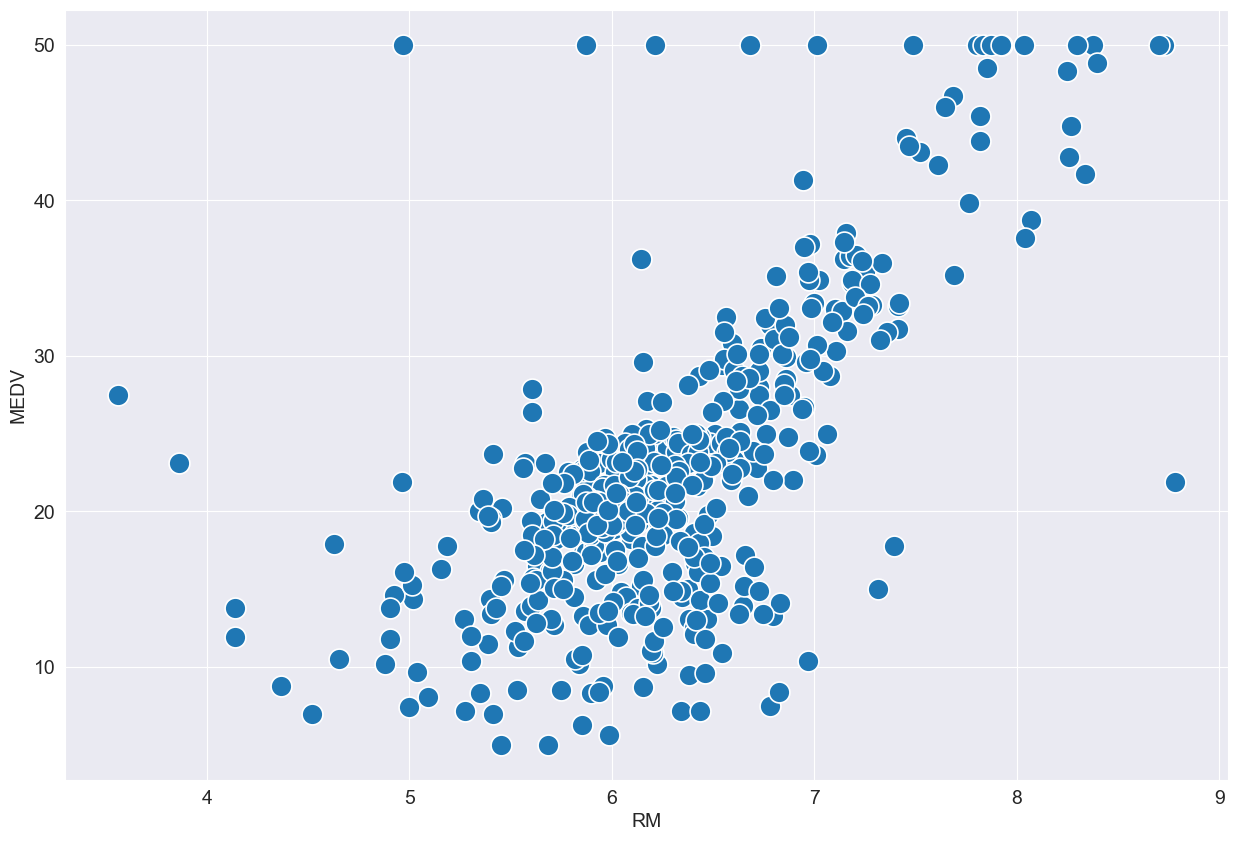

In [19]:
sns.scatterplot(x='RM', y='MEDV', data=df_src)

Смотрите, у на есть два типа потенциальных **выбросов**. 

* Одни выбросы - лежат на прямой на уровне около MEDV ~= 50. 
* Другие - выбиваются от общей зависимости в диапазонах: RM < 4 и (RM > 8 & MEDV < 30).

При обработке выбросов важно смотреть, что из себя представляют данные, поэтому выведем примеры и глянем на них:

In [20]:
outliers_1 = df_src[df_src['MEDV'] >= 50]
outliers_2 = df_src[(df_src['RM'] < 4) | ((df_src['RM'] > 8) & (df_src['MEDV'] < 30))]

In [21]:
outliers_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0


In [22]:
outliers_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
364,3.47428,0.0,18.1,1,0.718,8.780,82.9,1.9047,24,666.0,20.2,354.55,5.29,21.9
365,4.55587,0.0,18.1,0,0.718,3.561,87.9,1.6132,24,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666.0,20.2,131.42,13.33,23.1


Давайте посмотрим, выбросы по уровню цены = 50, которые очень нестандартно лежат на плоскости. 

По данным явно не видно очевидной зависимости, поэтому трудно сразу сказать, что это явные выбросы. Как правило, выбросы имеют сильные искажения в данных, что видно и по другим переменным.

Если всмотреться, то выбиваются именно точки, которые имеют RM < 7, а у них значение TAX = 666. Если построить распределение переменной TAX (вы это проделаете сами), то можно заметить, что значение 666 отстоит от основных данных, но таких записей с этим значением - аж 130, что сложно назвать выбросом.

Тем не менее, это повторяется и в выбросах, которые отстают от основной группы точек, что наводит на мысль, что это всё-таки их обощает.

Одно из предположений, которое можно сделать - **цензурирование данных**. Это подход, при котором в данных суммы и  информация, которую важно закрыть, заменяется каким-то константным значением.

Поэтому, при обработке, мы удалим эти данные, так как цензурирование искажает зависимости и это может сказаться на результатах работы.

Давайте попробуем подчистить данные и посмотреть, как изменятся распределения точек на графиках:

> ⚠️ Очистка данных - процесс очень выборочный, поэтому важно ещё раз всё перепроверять, чтобы не совершить ошибки, так как в результате данных становится меньше.

> ⚠️ В ходе очистки удаляются записи данных - строки.

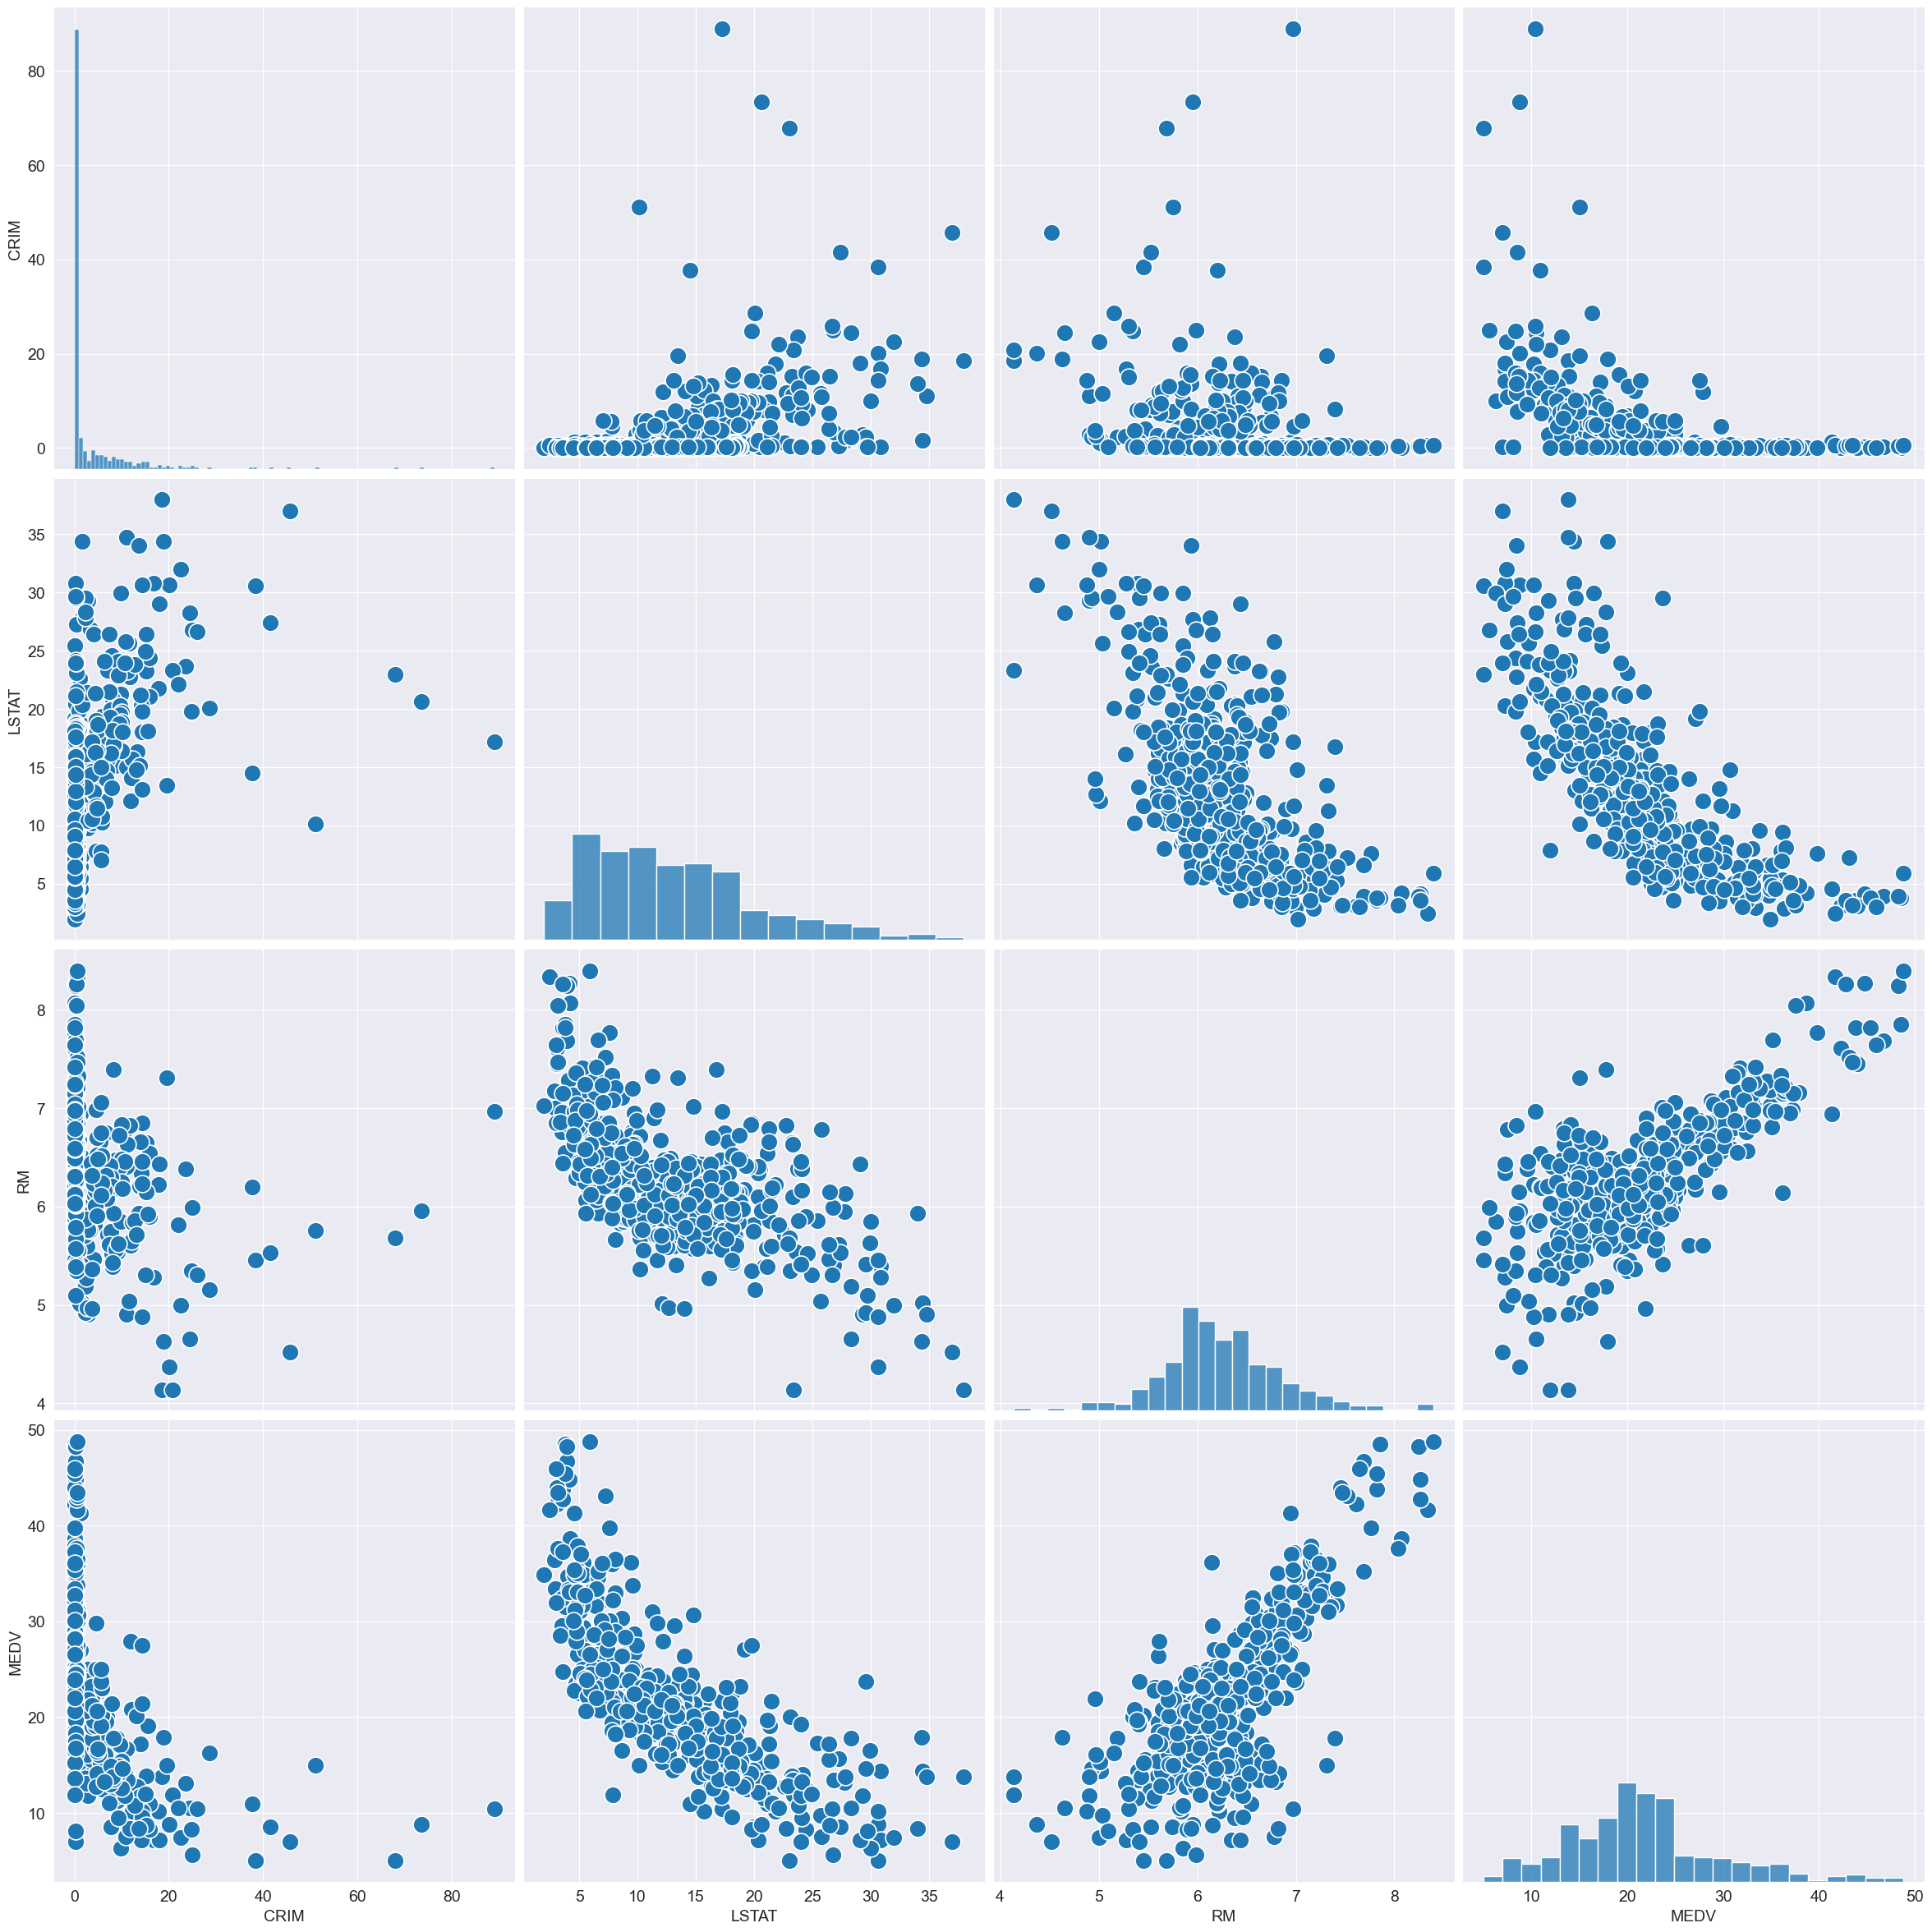

In [23]:
outliers_mask_1 = df_src['MEDV'] == 50
outliers_mask_2 = df_src['RM'] < 4
outliers_mask_3 = (df_src['RM'] > 8) & (df_src['MEDV'] < 30)

outliers_mask = outliers_mask_1 | outliers_mask_2 | outliers_mask_3

df_cleaned = df_src.loc[~outliers_mask]

sns.pairplot(df_cleaned[features], diag_kind='auto', height=6)

Как видите, график стал почище, а зависимость RM-MEDV стала более выраженной. Можем даже по-новой проверить корреляцию:

> ⚠️ Если вы обратили внимание, что на графике CRIM-MEDV много точек лежит на значении CRIM=0 - молодцы! Внимательность - это отлично! В данном случае мы не рассматриваем их в качестве кандидатов на выбросы, так как их мало и нам ещё помогает **смысл переменной**: много домов с низким криминальным уровнем - это нормально.

<AxesSubplot:>

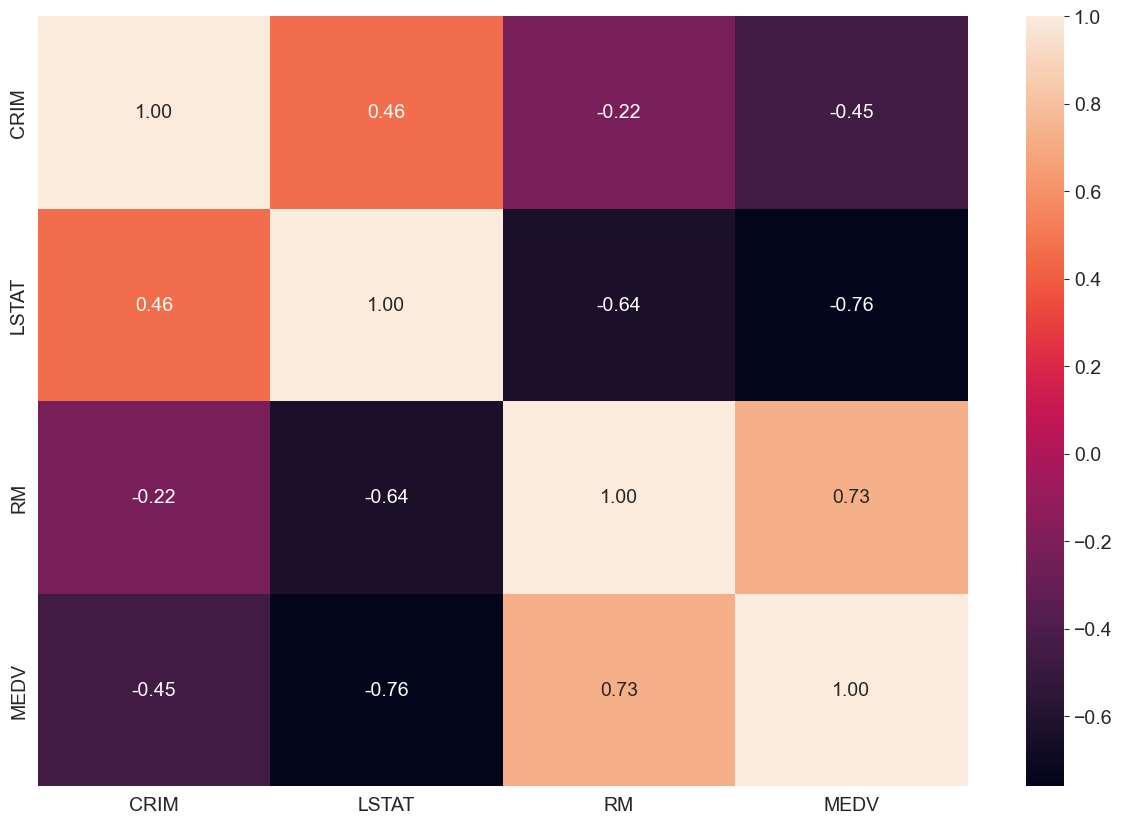

In [24]:
sns.heatmap(df_cleaned[features].corr(), annot=True, fmt='.2f')

RM-MEDV ранее был 0.7, а теперь стал 0.73 и всё благодаря чистке данных!

Как видите, как анализ одной переменной, так и анализ нескольких переменных не отличается чем-то сверх-научным. Как правило, данные достаточно посмотреть, пропустить через пару вычислений (как, например, корреляция) и уже можно составлять определённую картину.

Также, в подготовке и очистке данных помогает понимание данных. Так, например, если бы в наших данных количество комнат (RM) имело бы значения -1, то мы понимали бы, что такого быть не может и тоже рассматривали бы это как выбросы.

В результате, мы научились базовому анализу нескольких переменных (multivariate), рассмотрели, как можно детектировать выбросы и как оценивать зависимости численно - отличный результат, мы молодцы!

## Подготовка кода предобработки

Помимо того, что на каждом из этапов анализа проверяется своя подготовка, очистка и другая обработка данных - важно в конечном итоге сформировать единый код для предобработки данных, чтобы пользоваться было им удобно и он был более-менее универсален (была возможность применить его на новых данных).

Давайте выделим два этапа:

* очистка данных
* предобработка

Очистка делается для процесса обучения, чтобы модели предоставить более чистые данные без выбросов и лишнего шума.
Предобработка делатся как для обучения, так и для обработки новых данных.

> ⚠️ Помним, что конечная цель модели машинного обучения не просто обучиться и показать высокую метрику, а давать предсказания на новых данных и делать это хорошо.

Так вот важно предобработку нормально оформить, чтобы потом не пришлось корячиться с кодом, когда надо будет его разворачивать в облаке =)

Для этого нам поможет парадигма классов в Python!

Но перед этим, мы быстренько оформим код очитки данных:

In [25]:
# TODO - напишите функцию clean_dataset(), который принимает DataFrame на вход и выдает его очищенным
# NOTE - в функции надо выбрать выбросы той методикой, которую мы уже выработали и вернуть почищенный датасет

def clean_dataset(df_data):
    outliers_mask_1 = df_data['MEDV'] == 50
    outliers_mask_2 = df_data['RM'] < 4
    outliers_mask_3 = (df_data['RM'] > 8) & (df_data['MEDV'] < 30)

    outliers_mask = outliers_mask_1 | outliers_mask_2 | outliers_mask_3
    data_clean = df_data.loc[~outliers_mask]
    return data_clean


In [26]:
# TEST

_check_df = pd.DataFrame({
    'MEDV': [10, 20, 50, 50, 30, 10],
    'RM': [5, 6, 7, 7, 3, 8],
})
_test_result = clean_dataset(_check_df)

pd.testing.assert_index_equal(pd.Index([0, 1, 5]), _test_result.index)

print("Well done!")

Well done!


Отлично, функция очистки написана и её мы применим только для нашего датасета, поэтому её универсальность не так важна!

А теперь приступим к проработке класса для нашей собственной предобработки!

Начнём с архитектуры, вот так будет выглядеть наш класс:

In [27]:
class DataPreprocessing:
    def __init__(self):
        pass

    def fit(self, df):
        pass

    def transform(self, df):
        return df

Вот и весь класс, ничего страшного =)

Только, его методы (а-ля функции) ещё не реализованы, поэтому рано говорить о размерах кода =)

Давайте обсудим, что мы уже написали и зачем нужны эти методы:

### fit()

`.fit()` - это метод, который занимается сбором статистики с данных, чтобы их потом обработать. Собранную статистику мы будет хранить в атрибутах класса.

Что такое *сбор статистики*? 

Всё просто. Давайте вспомним, как в прошлый раз масштабировали данные с помощью MinMaxScale. По сути, нам нужно вычислить минимум и максимум в данных и затем применить формулу с этими константами.

А теперь вспомним, что нам надо масштабировать на обучающей выборке и выборке для теста.

Давайте рассмотрим плохой вариант (*неправильный*): мы вычисляем мин-макс на обучающей выборке, допустим, получили (минимум = 10 и максимум = 100). Преобразовали обучающую выборку и всё ок.

Теперь, берём тестовую и вычисляем то же самое (получаем, минимум = 20 и максимум = 105). Преобразовали тестовую выборку.

А что дальше?

Ну, модель обучится, ведь обучение - простая математика и предсказания будут как-то работать, но будет **концептуальная** ошибка!

Именно в том, что модель учится на данных, ей приходит значение признака 1.0, а в исходных данных 1.0 ~ 100 (ведь максимум на обучающей = 100). Потом мы передаём тестовую и там тоже есть значение 1.0, но только на тестовой это означает 105. 

К чему это приводит?

Модель ничего не заметит, сделает предсказание, а в нём будет ошибка! Ведь мы, хоть и не специально, начинаем модель путать, подавая данные, которые означают совсем другое, нежели на чём модель училась.

Что же мы можем сделать?

А что если, мы на обучающей выборке найдем минимум и максимум, запомним их и применим как к обучающей, так и тестовой выборке! Тогда, во всех данных (и даже в новых), 1.0 будет означать 100 и мы никого путать не будем!

> 🤓 Да, в нашем случае на тестовой будут значения больше 1.0, но это не страшно! Главное для масштабирования - привести к одинаковым порядкам, а для правильной обработки - собрать статистику на обучающей выборке (train) и дальше применять её для трансформации как на обучающей, так и на тестовой выборке!

Так вот мы и подошли к главному правилу в организации `fit()-transform()`: `fit()` всегда применяется только на train выборке! Эта функция собирает статистику, а её надо собирать только на обучающей выборке! На полной (train+test), не тестовой (test), а только на обучающей (train)!

### transform()

Ну тут уже все проще. Все этапы обработки данных, что требуют сбор статистики - собирают в `fit()`, ну а дальше просто применяем всю обработку в `transform()`! Все просто! =)

## Back to programming!

Отлично, мы разобрались, зачем нужен каждый метод! Давайте попробуем написать свой класс для предобработки!

Реализуем следующую предобработку:
- Выравнивание распределения для признака `DIS` с помощью логарифма
    - Нужно создать новый признак `DIS_log`, а старый удалить
- Генерация полиномиального признака для `LSTAT` с названием `LSTAT_poly_2`
- MinMaxScale - посмотрите на класс [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
    - Сделайте масштабирование всех признаков

По сути, это небольшой набор того, как мы запланировали предобработать данные по результатам анализа!

> 🔥 Объекты трансформеров из `sklearn` работают по аналогичному принципу, как мы с вами обсудили. Поэтому, при работе с ними можно сами объекты трансформеров создавать прямо в конструкторе нашего класса. `fit()` трансформеров вызывать в нашем методе `fit()`, ну и `transform()`, соответственно.

In [28]:
# TODO - реализуйте описанную предобработку
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

class DataPreprocessing:
    
    def __init__(self):
        pass
    
    def fit(self, df = pd.DataFrame):
        # Скопируем исходные данные, чтобы не изменять их
        df_copy = df.copy()
        df['DIS'] = np.log(df['DIS'])
        df.rename(columns={'DIS':'DIS_log'},inplace=True)
        # Здесь обратите внимание, что нужно сгенерировать полином и выровнять логарифмом, чтобы MinMaxScaler обучился и на них тоже
        pass

    def transform(self, df = pd.DataFrame):
        df['LSTAT_poly_2'] = df['LSTAT']**2
        scaler.fit(df)
        new_col = scaler.transform(df)
        for iter in range(len(df.columns)):
                df.iloc[:,iter] = new_col[:,iter]
        # Возвращать transform() должен тоже DataFrame!
        return df

In [29]:
# TEST

_test_df = pd.DataFrame({'DIS': [2.3, 1.9, 0.4, 2.2], 'LSTAT': [0.1, 0.2, 0.3, 0.4], 'MORE_FEAT': [1, 2, 3, 4]}, index=[4, 6, 10, 12])

preproc = DataPreprocessing()

preproc.fit(_test_df)

_test_result = preproc.transform(_test_df)

_test_expected = pd.DataFrame({
    'DIS_log': [1.0, 0.8907756387942631, 0.0, 0.9745873735075969], 
    'LSTAT': [0.0, 0.333, 0.666, 1.0], 
    'LSTAT_poly_2': [0.0, 0.2, 0.5333, 1.], 
    'MORE_FEAT': [0.0, 0.333, 0.666, 1.0]
}, index=_test_df.index)

pd.testing.assert_frame_equal(_test_result, _test_expected, check_like=True, atol=1e-3)

print("Well done!")

Well done!


Если вы прошли тест - значит вы большие молодцы!!

В результате такой класс можно спокойно применять для подготовки данных для обучения модели и более того, для подготовки данных при поступлении новых!

А это значит, мы ещё не обучили, но уже готовы предсказывать и показывать, как круто наша модель работает! Стремимся к высоким целям! 

## Заключение

В результате прохождения этой практики вы узнали очень важный факт (а может и несколько). 

**Анализ данных нужен и важен!**

Конечно, мы только увидели пару приёмов, но в следующей практике, вы попробуете их в бою и увидите, что это действительно работает!

## Вопросы для закрепления

А теперь пара вопросов, чтобы закрепить материал!

1. Зачем нужны классы в DS?
2. Чем полезна предобработка данных? 
3. Опасно ли удалять какие-то данные из исходных? Когда можно такое делать? 
4. На какой выборке применяется метод-fit?
5. На какой выборке применяется метод-transform?

## Полезные ссылки
* [Linear Discriminant Analysis (LDA) от StatQuest](https://www.youtube.com/watch?v=azXCzI57Yfc)
* [Basic Statistics for Data Science на Medium](https://medium.com/mlearning-ai/important-statistical-concepts-for-data-scientists-54e09106b75e)
* [Quartiles for Beginners in DS на Medium](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-2ca5a640b07b)
* [Understanding Value of Correlations in DS на Medium](https://medium.com/fintechexplained/did-you-know-the-importance-of-finding-correlations-in-data-science-1fa3943debc2)
* [Correlation](https://luminousmen.com/post/data-science-correlation)
* [Fundamentals of Statistics](https://towardsdatascience.com/fundamentals-of-statistics-for-data-scientists-and-data-analysts-69d93a05aae7)
